In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [12]:
def generate_roc_curve(
        tpr: float,
        fpr: float,
        n_nodes: int,
        n_samples: int = 1,
        p: int = None,
        n: int = None,
        random_state = None
):
    
    if not isinstance(random_state, np.random.RandomState):
        random_state = np.random.RandomState(random_state)

    tprs = np.full((n_samples, n_nodes), fill_value=-1, dtype=float)
    fprs = np.full((n_samples, n_nodes), fill_value=-1, dtype=float)

    tprs[:, 0] = 0.0
    tprs[:, -1] = 1.0

    fprs[:, 0] = 0.0
    fprs[:, -1] = 1.0

    middle_indices = random_state.choice(list(range(1, n_nodes-1)), n_samples)

    tprs[np.arange(0, n_samples), middle_indices] = tpr
    fprs[np.arange(0, n_samples), middle_indices] = fpr

    first_indices = np.repeat(0, n_samples)
    last_indices = middle_indices
    queue = np.vstack((first_indices, last_indices)).T

    first_indices = middle_indices.copy()
    last_indices = np.repeat(n_nodes - 1, n_samples)
    queue = np.vstack([queue, np.vstack((first_indices, last_indices)).T])

    sample_indices = np.hstack([np.arange(0, n_samples), np.arange(0, n_samples)])

    idx = 0
    while queue.shape[0] > 0:

        first_indices = queue[:, 0]
        last_indices = queue[:, 1]

        fpr_ranges = fprs[sample_indices, last_indices] - fprs[sample_indices, first_indices]
        uniforms = random_state.random_sample(fpr_ranges.shape[0])
        fpr_steps = (uniforms * fpr_ranges)

        tpr_ranges = tprs[sample_indices, last_indices] - tprs[sample_indices, first_indices]
        uniforms = random_state.random_sample(tpr_ranges.shape[0])
        tpr_steps = (uniforms * tpr_ranges)

        index_ranges = last_indices - first_indices - 1
        uniforms = random_state.random_sample(index_ranges.shape[0])
        index_steps = np.floor(index_ranges * uniforms).astype(int) + 1

        fprs[sample_indices, first_indices + index_steps] = fprs[sample_indices, first_indices] + fpr_steps
        tprs[sample_indices, first_indices + index_steps] = tprs[sample_indices, first_indices] + tpr_steps

        lhs_queue = np.vstack([first_indices, first_indices + index_steps]).T
        rhs_queue = np.vstack([first_indices + index_steps, last_indices]).T
        queue = np.vstack([lhs_queue, rhs_queue])
        sample_indices = np.hstack([sample_indices, sample_indices])

        mask = queue[:, 0] < queue[:, 1] - 1
        queue = queue[mask]
        sample_indices = sample_indices[mask]
        first_indices = queue[:, 0]
        last_indices = queue[:, 1]

        idx += 1
    
    if p is not None:
        tprs = np.round(tprs * p) / p
    if n is not None:
        fprs = np.round(fprs * n) / n
        
    return fprs, tprs

In [17]:
curves = generate_roc_curve(0.8, 0.2, n_nodes=10, n_samples=3, p=10, n=10)

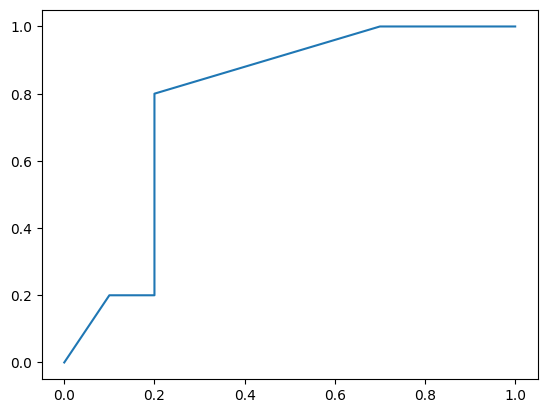

In [18]:
plt.plot(curves[0][1], curves[1][1])

In [5]:
tmp = np.zeros(shape=(3, 5))
tmp[np.array([0, 1, 2, 0, 1, 2]), np.array([1, 2, 3, 2, 3, 4])] = 1
tmp

array([[0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1.]])